# Delta Inside Valle-Inclán: Stylometric Classification of Periods and Groups of His Novels

## Import

In [1]:
import sys
import os
sys.path.append(os.path.abspath("/home/jose/Dropbox/MTB/investigacion/"))
from sklearn.model_selection import cross_val_score, cross_val_predict
from mytoolbox.reading_robot import use_supervised, call_stylo, load_data, classify
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## Call stylo

In [2]:
wdir = "/home/jose/Dropbox/MTB/investigacion/git_publications/Delta_Valle/data/novels/"

In [3]:
deltamatrix = call_stylo.calculate_delta(wdir, distance_measure = "cosine_delta")

/usr/local/lib/python3.4/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
### stylo version: 0.6.5 ###

If you plan to cite this software (please do!), use the following reference:
    Eder, M., Rybicki, J. and Kestemont, M. (2016). Stylometry with R:
    a package for computational text analysis. R Journal 8(1): 107-121.
    <https://journal.r-project.org/archive/2016/RJ-2016-007/index.html>

To get full BibTeX entry, type: citation("stylo")

  warnings.warn(x, RRuntimeWarning)


Stylo version:  [1] ‘0.6.5’

using current directory...

Performing no sampling (using entire text as sample)

loading ne0013.txt	...

loading ne0014.txt	...

loading ne0015.txt	...

loading ne0016.txt	...

loading ne0017.txt	...

loading ne0020.txt	...

loading ne0021.txt	...

loading ne0022.txt	...

loading ne0030.txt	...

loading ne0033.txt	...

loading ne0035.txt	...

loading ne0036.txt	...

loading ne0037.txt	...

slicing input text into tokens...

turning words into features, e.g. char n-grams (if applicable)...



Total nr. of samples in the corpus: 
 
13
 


.
.
.
.
.
.
.
.
.
.
.
.
.


The corpus consists of
 
451513
 
tokens





/usr/local/lib/python3.4/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: processing  13  text samples

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.4/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: .
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.4/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning:        

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.4/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: combining frequencies into a table...

  warnings.warn(x, RRuntimeWarning)





culling @ 
 
0
 
	
 
available features (words) 
 
5000
 


Calculating z-scores... 


MFW used: 
5000
 
 




In [5]:
wsdir = "/home/jose/Dropbox/MTB/investigacion/git_publications/Delta_Valle/data/novels/author-name/"
deltamatrix_authorname = call_stylo.calculate_delta(wsdir, distance_measure = "cosine_delta")

Stylo version:  [1] ‘0.6.5’

using current directory...

Performing no sampling (using entire text as sample)

loading Valle_Baza-ne0036.txt	...

loading Valle_Corte-ne0033.txt	...

loading Valle_CruzadosCausa-ne0020.txt	...

loading Valle_FlordeSantidad-ne0017.txt	...

loading Valle_GerifaltesAntano-ne0022.txt	...

loading Valle_MediaNoche-ne0037.txt	...

loading Valle_ResplandorHoguera-ne0021.txt	...

loading Valle_SonataEstio-ne0014.txt	...

loading Valle_SonataInvierno-ne0016.txt	...

loading Valle_SonataOtono-ne0013.txt	...

loading Valle_SonataPrimavera-ne0015.txt	...

loading Valle_TiranoBanderas-ne0030.txt	...

loading Valle_Viva-ne0035.txt	...

slicing input text into tokens...

turning words into features, e.g. char n-grams (if applicable)...



Total nr. of samples in the corpus: 
 
13
 


.
.
.
.
.
.
.
.
.
.
.
.
.


The corpus consists of
 
451513
 
tokens





/usr/local/lib/python3.4/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: processing  13  text samples

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.4/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: .
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.4/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning:        

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.4/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: combining frequencies into a table...

  warnings.warn(x, RRuntimeWarning)





culling @ 
 
0
 
	
 
available features (words) 
 
5000
 


Calculating z-scores... 


MFW used: 
5000
 
 




## Load Metadata

In [6]:
metadata = load_data.load_metadata(wdir, metadata_table = "metadata_beta-opt-obl.csv",  sep = ",")

metadata and class shape: 	 (13, 72)


## Classify Period

### Create Train and Test Delta Matrix and Metadata

In [7]:
metadata_sure_period = metadata.loc[metadata["period"].isin(["first","second"])]
metadata_sure_period

,idno,author-country,author-name,author_viaf,author_bne,author-gender,title,title_main,title_viaf,title_bne,...,Diez-Echarri,Bolufer,Calvo Tello,hypo-class,hypo3,1905,1920,period,group,group2
ne0013,ne0013,Spain,Valle,68936773,XX1055436,male,SonataOtono,Sonata de otoño,182402052,XX2017507,...,sonatas,sonatas,sonatas,sonatas,sonatas,1,0,first,sonatas,sonatas
ne0014,ne0014,Spain,Valle,68936773,XX1055436,male,SonataEstio,Sonata de estío,174999407,XX3383625,...,sonatas,sonatas,sonatas,sonatas,sonatas,1,0,first,sonatas,sonatas
ne0015,ne0015,Spain,Valle,68936773,XX1055436,male,SonataPrimavera,Sonata de primavera,181048902,XX3383843,...,sonatas,sonatas,sonatas,sonatas,sonatas,1,0,first,sonatas,sonatas
ne0016,ne0016,Spain,Valle,68936773,XX1055436,male,SonataInvierno,Sonata de invierno,177949330,XX2017509,...,sonatas,sonatas,sonatas,sonatas,sonatas,1,0,first,sonatas,sonatas
ne0017,ne0017,Spain,Valle,68936773,XX1055436,male,FlordeSantidad,Flor de santidad,206861048,XX2215970,...,otro,flor,social-bélico,carlista,other2,1,0,first,?,carlista
ne0030,ne0030,Spain,Valle,68936773,XX1055436,male,TiranoBanderas,Tirano banderas,179510026,XX1923189,...,mejicano,esperpéntica,esperpéntica,esperpéntica,other4,0,1,second,?,esperpéntica
ne0033,ne0033,Spain,Valle,68936773,XX1055436,male,Corte,La Corte de los Milagros,220171699,n.av.,...,isabelino,esperpéntica,esperpéntica,esperpéntica,esperpéntica,0,1,second,esperpéntica,esperpéntica
ne0035,ne0035,Spain,Valle,68936773,XX1055436,male,Viva,Viva mi dueño,n.av.,XX2216026,...,isabelino,esperpéntica,esperpéntica,esperpéntica,esperpéntica,0,1,second,esperpéntica,esperpéntica
ne0036,ne0036,Spain,Valle,68936773,XX1055436,male,Baza,Baza de espadas,n.av.,bimo0000274750,...,isabelino,esperpéntica,esperpéntica,esperpéntica,esperpéntica,0,1,second,esperpéntica,esperpéntica


In [8]:
metadata_unsure_period = metadata.loc[metadata["period"].isin(["?"])]
metadata_unsure_period

,idno,author-country,author-name,author_viaf,author_bne,author-gender,title,title_main,title_viaf,title_bne,...,Diez-Echarri,Bolufer,Calvo Tello,hypo-class,hypo3,1905,1920,period,group,group2
ne0020,ne0020,Spain,Valle,68936773,XX1055436,male,CruzadosCausa,Los cruzados de la Causa,175126136,n.av.,...,carlista,bélica,social-bélico,carlista,carlista,0,0,?,carlista,carlista
ne0021,ne0021,Spain,Valle,68936773,XX1055436,male,ResplandorHoguera,El resplandor de la hoguera,314167748,XX3384448,...,carlista,bélica,social-bélico,carlista,carlista,0,0,?,carlista,carlista
ne0022,ne0022,Spain,Valle,68936773,XX1055436,male,GerifaltesAntano,Gerifaltes de antaño,178795042,XX1976382,...,carlista,bélica,social-bélico,carlista,carlista,0,0,?,carlista,carlista
ne0037,ne0037,Spain,Valle,68936773,XX1055436,male,MediaNoche,La media noche,313997394,XX2215989,...,forgotten,bélica,social-bélico,carlista,other1,0,0,?,?,carlista


In [9]:
sure_period_deltamatrix = deltamatrix.loc[metadata_sure_period.index.tolist(),:]
sure_period_deltamatrix

,ne0013,ne0014,ne0015,ne0016,ne0017,ne0020,ne0021,ne0022,ne0030,ne0033,ne0035,ne0036,ne0037
ne0013,0.000000,0.940162,0.876095,0.966607,0.955439,1.028797,1.071099,1.060250,1.225793,1.232644,1.268999,1.241083,1.103512
ne0014,0.940162,0.000000,0.914522,0.974481,1.008999,1.075866,1.099282,1.130784,1.141699,1.216560,1.218655,1.174412,1.054422
ne0015,0.876095,0.914522,0.000000,0.919314,1.002546,1.074586,1.118620,1.089544,1.194389,1.229721,1.245207,1.238654,1.111897
ne0016,0.966607,0.974481,0.919314,0.000000,1.112412,1.056599,1.070004,1.032626,1.183651,1.133167,1.179688,1.158251,1.140878
ne0017,0.955439,1.008999,1.002546,1.112412,0.000000,0.989014,0.995320,1.076510,1.191259,1.224428,1.255106,1.251199,0.975560
ne0030,1.225793,1.141699,1.194389,1.183651,1.191259,1.146655,1.157338,1.110907,0.000000,0.891469,0.857887,0.862718,1.083579
ne0033,1.232644,1.216560,1.229721,1.133167,1.224428,1.141642,1.148602,1.133055,0.891469,0.000000,0.630792,0.828556,1.180849
ne0035,1.268999,1.218655,1.245207,1.179688,1.255106,1.159847,1.184728,1.147283,0.857887,0.630792,0.000000,0.712258,1.170573
ne0036,1.241083,1.174412,1.238654,1.158251,1.251199,1.163401,1.164820,1.140032,0.862718,0.828556,0.712258,0.000000,1.141086


In [10]:
unsure_period_deltamatrix = deltamatrix.loc[metadata_unsure_period.index.tolist(),:]
unsure_period_deltamatrix

,ne0013,ne0014,ne0015,ne0016,ne0017,ne0020,ne0021,ne0022,ne0030,ne0033,ne0035,ne0036,ne0037
ne0020,1.028797,1.075866,1.074586,1.056599,0.989014,0.000000,0.964977,1.014992,1.146655,1.141642,1.159847,1.163401,1.093433
ne0021,1.071099,1.099282,1.118620,1.070004,0.995320,0.964977,0.000000,0.876588,1.157338,1.148602,1.184728,1.164820,1.049030
ne0022,1.060250,1.130784,1.089544,1.032626,1.076510,1.014992,0.876588,0.000000,1.110907,1.133055,1.147283,1.140032,1.078728
ne0037,1.103512,1.054422,1.111897,1.140878,0.975560,1.093433,1.049030,1.078728,1.083579,1.180849,1.170573,1.141086,0.000000


### Evalute Train Corpus

In [11]:
classifier = classify.choose_classifier(method = "KNN")

method used:	 KNN


In [12]:
scores = cross_val_score(classifier, sure_period_deltamatrix, metadata_sure_period["period"], cv=4)
scores

array([1., 1., 1., 1.])

### Predict Period of Disputed Texts

In [13]:
classifier.fit(sure_period_deltamatrix, metadata_sure_period["period"])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [14]:
results = classifier.predict(unsure_period_deltamatrix)
results

array(['first', 'first', 'first', 'first'], dtype=object)

### Evaluted 1920 and 1905 Hypothesis

In [15]:
scores_1920 = cross_val_score(classifier, deltamatrix, metadata["1920"], cv=4)
scores_1920

array([1., 1., 1., 1.])

In [16]:
scores_1905 = cross_val_score(classifier, deltamatrix, metadata["1905"], cv=4)
scores_1905

array([0.75      , 1.        , 1.        , 0.66666667])

In [17]:
scores_hypothesis = pd.DataFrame([scores_1905,scores_1920], index=["Hypothesis 1905","Hypothesis 1920"]).T
scores_hypothesis

,Hypothesis 1905,Hypothesis 1920
0,0.750000,1.0
1,1.000000,1.0
2,1.000000,1.0
3,0.666667,1.0


In [18]:
scores_hypothesis.median()

Hypothesis 1905    0.875
Hypothesis 1920    1.000
dtype: float64

In [19]:
scores_hypothesis.std()

Hypothesis 1905    0.171796
Hypothesis 1920    0.000000
dtype: float64

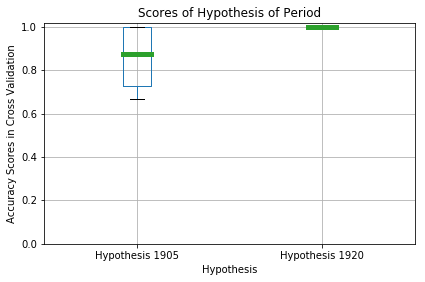

In [20]:
fig, ax1 = plt.subplots()
ax1.tick_params(labeltop=False)
ax1 = scores_hypothesis.boxplot(medianprops=dict(linewidth=5))

plt.title(r"Scores of Hypothesis of Period")
plt.ylabel("Accuracy Scores in Cross Validation")
plt.xlabel("Hypothesis")

plt.ylim(ymin=0)
plt.tight_layout()
plt.savefig(wdir+"boxplot_period.png", dpi=300, format="png")

plt.show()

## Classify Group of Text

### Create Train and Test Delta Matrix and Metadata

In [21]:
metadata_sure_group = metadata.loc[metadata["group"].isin(["sonatas","carlista","esperpéntica"])]
metadata_sure_group

,idno,author-country,author-name,author_viaf,author_bne,author-gender,title,title_main,title_viaf,title_bne,...,Diez-Echarri,Bolufer,Calvo Tello,hypo-class,hypo3,1905,1920,period,group,group2
ne0013,ne0013,Spain,Valle,68936773,XX1055436,male,SonataOtono,Sonata de otoño,182402052,XX2017507,...,sonatas,sonatas,sonatas,sonatas,sonatas,1,0,first,sonatas,sonatas
ne0014,ne0014,Spain,Valle,68936773,XX1055436,male,SonataEstio,Sonata de estío,174999407,XX3383625,...,sonatas,sonatas,sonatas,sonatas,sonatas,1,0,first,sonatas,sonatas
ne0015,ne0015,Spain,Valle,68936773,XX1055436,male,SonataPrimavera,Sonata de primavera,181048902,XX3383843,...,sonatas,sonatas,sonatas,sonatas,sonatas,1,0,first,sonatas,sonatas
ne0016,ne0016,Spain,Valle,68936773,XX1055436,male,SonataInvierno,Sonata de invierno,177949330,XX2017509,...,sonatas,sonatas,sonatas,sonatas,sonatas,1,0,first,sonatas,sonatas
ne0020,ne0020,Spain,Valle,68936773,XX1055436,male,CruzadosCausa,Los cruzados de la Causa,175126136,n.av.,...,carlista,bélica,social-bélico,carlista,carlista,0,0,?,carlista,carlista
ne0021,ne0021,Spain,Valle,68936773,XX1055436,male,ResplandorHoguera,El resplandor de la hoguera,314167748,XX3384448,...,carlista,bélica,social-bélico,carlista,carlista,0,0,?,carlista,carlista
ne0022,ne0022,Spain,Valle,68936773,XX1055436,male,GerifaltesAntano,Gerifaltes de antaño,178795042,XX1976382,...,carlista,bélica,social-bélico,carlista,carlista,0,0,?,carlista,carlista
ne0033,ne0033,Spain,Valle,68936773,XX1055436,male,Corte,La Corte de los Milagros,220171699,n.av.,...,isabelino,esperpéntica,esperpéntica,esperpéntica,esperpéntica,0,1,second,esperpéntica,esperpéntica
ne0035,ne0035,Spain,Valle,68936773,XX1055436,male,Viva,Viva mi dueño,n.av.,XX2216026,...,isabelino,esperpéntica,esperpéntica,esperpéntica,esperpéntica,0,1,second,esperpéntica,esperpéntica
ne0036,ne0036,Spain,Valle,68936773,XX1055436,male,Baza,Baza de espadas,n.av.,bimo0000274750,...,isabelino,esperpéntica,esperpéntica,esperpéntica,esperpéntica,0,1,second,esperpéntica,esperpéntica


In [22]:
sure_group_deltamatrix = deltamatrix.loc[metadata_sure_group.index.tolist(),:]
sure_group_deltamatrix

,ne0013,ne0014,ne0015,ne0016,ne0017,ne0020,ne0021,ne0022,ne0030,ne0033,ne0035,ne0036,ne0037
ne0013,0.000000,0.940162,0.876095,0.966607,0.955439,1.028797,1.071099,1.060250,1.225793,1.232644,1.268999,1.241083,1.103512
ne0014,0.940162,0.000000,0.914522,0.974481,1.008999,1.075866,1.099282,1.130784,1.141699,1.216560,1.218655,1.174412,1.054422
ne0015,0.876095,0.914522,0.000000,0.919314,1.002546,1.074586,1.118620,1.089544,1.194389,1.229721,1.245207,1.238654,1.111897
ne0016,0.966607,0.974481,0.919314,0.000000,1.112412,1.056599,1.070004,1.032626,1.183651,1.133167,1.179688,1.158251,1.140878
ne0020,1.028797,1.075866,1.074586,1.056599,0.989014,0.000000,0.964977,1.014992,1.146655,1.141642,1.159847,1.163401,1.093433
ne0021,1.071099,1.099282,1.118620,1.070004,0.995320,0.964977,0.000000,0.876588,1.157338,1.148602,1.184728,1.164820,1.049030
ne0022,1.060250,1.130784,1.089544,1.032626,1.076510,1.014992,0.876588,0.000000,1.110907,1.133055,1.147283,1.140032,1.078728
ne0033,1.232644,1.216560,1.229721,1.133167,1.224428,1.141642,1.148602,1.133055,0.891469,0.000000,0.630792,0.828556,1.180849
ne0035,1.268999,1.218655,1.245207,1.179688,1.255106,1.159847,1.184728,1.147283,0.857887,0.630792,0.000000,0.712258,1.170573
ne0036,1.241083,1.174412,1.238654,1.158251,1.251199,1.163401,1.164820,1.140032,0.862718,0.828556,0.712258,0.000000,1.141086


In [23]:
metadata_unsure_group = metadata.loc[metadata["group"].isin(["?"])]
metadata_unsure_group

,idno,author-country,author-name,author_viaf,author_bne,author-gender,title,title_main,title_viaf,title_bne,...,Diez-Echarri,Bolufer,Calvo Tello,hypo-class,hypo3,1905,1920,period,group,group2
ne0017,ne0017,Spain,Valle,68936773,XX1055436,male,FlordeSantidad,Flor de santidad,206861048,XX2215970,...,otro,flor,social-bélico,carlista,other2,1,0,first,?,carlista
ne0030,ne0030,Spain,Valle,68936773,XX1055436,male,TiranoBanderas,Tirano banderas,179510026,XX1923189,...,mejicano,esperpéntica,esperpéntica,esperpéntica,other4,0,1,second,?,esperpéntica
ne0037,ne0037,Spain,Valle,68936773,XX1055436,male,MediaNoche,La media noche,313997394,XX2215989,...,forgotten,bélica,social-bélico,carlista,other1,0,0,?,?,carlista


In [24]:
unsure_group_deltamatrix = deltamatrix.loc[metadata_unsure_group.index.tolist(),:]
unsure_group_deltamatrix.head()

,ne0013,ne0014,ne0015,ne0016,ne0017,ne0020,ne0021,ne0022,ne0030,ne0033,ne0035,ne0036,ne0037
ne0017,0.955439,1.008999,1.002546,1.112412,0.000000,0.989014,0.995320,1.076510,1.191259,1.224428,1.255106,1.251199,0.975560
ne0030,1.225793,1.141699,1.194389,1.183651,1.191259,1.146655,1.157338,1.110907,0.000000,0.891469,0.857887,0.862718,1.083579
ne0037,1.103512,1.054422,1.111897,1.140878,0.975560,1.093433,1.049030,1.078728,1.083579,1.180849,1.170573,1.141086,0.000000


### Evalute Train Corpus

In [25]:
classifier = classify.choose_classifier(method = "KNN")

method used:	 KNN


In [26]:
scores = cross_val_score(classifier, sure_group_deltamatrix, metadata_sure_group["group"], cv=3)
scores

array([1., 1., 1.])

### Predict Group of Disputed Texts

In [27]:
classifier.fit(sure_group_deltamatrix, metadata_sure_group["group"])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [28]:
results = classifier.predict(unsure_group_deltamatrix)
for shit in zip(unsure_group_deltamatrix.index.tolist(),results):
    print(shit)


('ne0017', 'carlista')
('ne0030', 'esperpéntica')
('ne0037', 'carlista')


### Evaluted Group of Works' Hypothesis

In [29]:
scores_novels = pd.DataFrame(columns=['0','1','2','4'])
for hypothesis in ["Pedraza-Rodriguez","Nora","Bolufer","Calvo Tello"]:
    scores = cross_val_score(classifier, deltamatrix, metadata[hypothesis], cv=4)
    print(hypothesis, scores.mean(), scores.std())
    scores_novels.loc[hypothesis] = scores

Pedraza-Rodriguez 0.875 0.21650635094610965
Nora 0.825 0.20463381929681124
Bolufer 0.9375 0.10825317547305482
Calvo Tello 1.0 0.0


/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


In [30]:
scores_novels

,0,1,2,4
Pedraza-Rodriguez,0.50,1.0,1.0,1.0
Nora,0.80,1.0,1.0,0.5
Bolufer,0.75,1.0,1.0,1.0
Calvo Tello,1.00,1.0,1.0,1.0


In [31]:
scores_novels.T.median()

Pedraza-Rodriguez    1.0
Nora                 0.9
Bolufer              1.0
Calvo Tello          1.0
dtype: float64

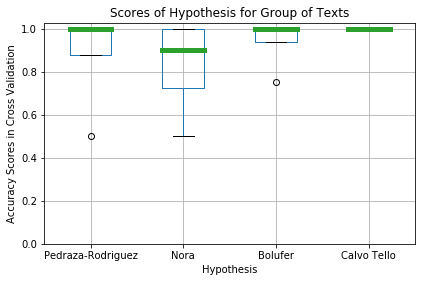

In [32]:
fig, ax1 = plt.subplots()
ax1.tick_params(labeltop=False)
ax1 = scores_novels.T.boxplot(medianprops=dict(linewidth=5))

plt.title(r"Scores of Hypothesis for Group of Texts")
plt.ylabel("Accuracy Scores in Cross Validation")
plt.xlabel("Hypothesis")
plt.ylim(ymin=0)
plt.tight_layout()
plt.savefig(wdir+"boxplot_group.png", dpi=300, format="png")

plt.show()

In [33]:
wdir = "/home/jose/Dropbox/Doktorarbeit/publications/201802 Classification Valle/data/novels/group-texts/"

In [34]:
deltamatrix = call_stylo.calculate_delta(wdir, distance_measure = "cosine_delta")

Stylo version:  [1] ‘0.6.5’

using current directory...

Performing no sampling (using entire text as sample)

loading Bélico-social_CruzadosCausa-ne0020.txt	...

loading Bélico-social_FlordeSantidad-ne0017.txt	...

loading Bélico-social_GerifaltesAntano-ne0022.txt	...

loading Bélico-social_MediaNoche-ne0037.txt	...

loading Bélico-social_ResplandorHoguera-ne0021.txt	...

loading Esperpéntico_Baza-ne0036.txt	...

loading Esperpéntico_Corte-ne0033.txt	...

loading Esperpéntico_TiranoBanderas-ne0030.txt	...

loading Esperpéntico_Viva-ne0035.txt	...

loading Sonatas_SonataEstio-ne0014.txt	...

loading Sonatas_SonataInvierno-ne0016.txt	...

loading Sonatas_SonataOtono-ne0013.txt	...

loading Sonatas_SonataPrimavera-ne0015.txt	...

slicing input text into tokens...

turning words into features, e.g. char n-grams (if applicable)...



Total nr. of samples in the corpus: 
 
13
 


.
.
.
.
.
.
.
.
.
.
.
.
.


The corpus consists of
 
451513
 
tokens






culling @ 
 
0
 
	
 
available featur

/usr/local/lib/python3.4/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: processing  13  text samples

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.4/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: .
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.4/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning:        

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.4/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: combining frequencies into a table...

  warnings.warn(x, RRuntimeWarning)
